In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir(f'/Users/katsuhisadeto/Python学習/LLM-Hackathon/sample-apps')

In [3]:
# JSONファイルを開いてデータを読み込む
with open('deepsource_response.json', 'r') as file:
    data = json.load(file)

# occurrenceDistributionByAnalyzerのデータを取得
analyzers_data = data['data']['repository']['analysisRuns']['edges'][0]['node']['summary']['occurrenceDistributionByAnalyzer']

# occurrenceDistributionByCategoryのデータを取得
categories_data = data['data']['repository']['analysisRuns']['edges'][0]['node']['summary']['occurrenceDistributionByCategory']

In [4]:
categories_data

[{'category': 'DOCUMENTATION', 'introduced': 8},
 {'category': 'STYLE', 'introduced': 2}]

In [5]:
# 言語別の行数を読み込む
with open('language_lines.json', 'r') as file:
    language_lines = json.load(file)
language_lines

{'php': 7, 'ruby': 12, 'html': 45, 'javascript': 26, 'c': 18, 'python': 12}

In [7]:
# エラー率を計算するための関数
def calculate_error_rate(row, total_lines):
    if total_lines > 0:
        return row['introduced'] / total_lines
    else:
        return None

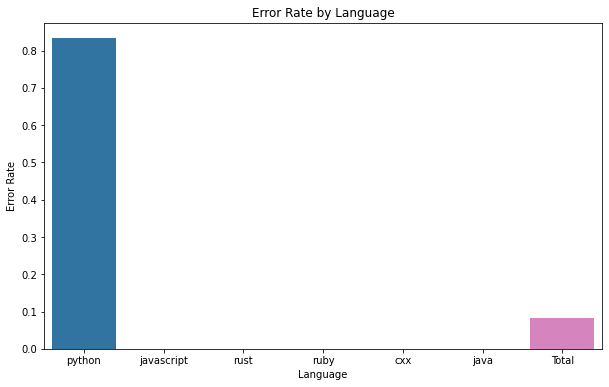

In [8]:
# 言語別のエラー率を計算とグラフ描写
analyzers_df = pd.DataFrame(analyzers_data)
analyzers_df['error_rate'] = analyzers_df.apply(lambda row: calculate_error_rate(row, language_lines.get(row['analyzerShortcode'].lower(), 0)), axis=1)

# 全体のエラー率を計算
total_errors = analyzers_df['introduced'].sum()
total_lines = sum(language_lines.values())
total_error_rate = total_errors / total_lines if total_lines > 0 else None
analyzers_df = analyzers_df.append({'analyzerShortcode': 'Total', 'error_rate': total_error_rate}, ignore_index=True)

# エラー率の棒グラフを作成（言語別）
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=analyzers_df, x='analyzerShortcode', y='error_rate')
barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=10)
plt.title('Error Rate by Language')
plt.xlabel('Language')
plt.ylabel('Error Rate')
# plt.savefig('error_rate_by_language.png')
plt.show()

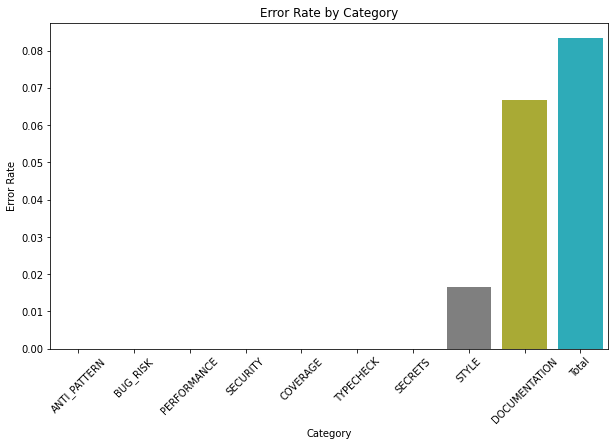

In [11]:
# カテゴリ別のエラー率を計算とグラフ描写
categories_df = pd.DataFrame(categories_data)
categories_df['error_rate'] = categories_df.apply(lambda row: calculate_error_rate(row, total_lines), axis=1)

# カテゴリ別のエラー率の合計を計算
total_category_error_rate = categories_df['error_rate'].sum()

# 指定したエラーカテゴリ
error_categories = ['ANTI_PATTERN', 'BUG_RISK', 'PERFORMANCE', 'SECURITY', 'COVERAGE', 'TYPECHECK', 'SECRETS', 'STYLE', 'DOCUMENTATION']

# 指定したカテゴリにデータがない場合は0を設定
for category in error_categories:
    if category not in categories_df['category'].values:
        categories_df = categories_df.append({'category': category, 'error_rate': 0}, ignore_index=True)

# カテゴリ別のエラー率の合計をデータフレームに追加
categories_df = categories_df.append({'category': 'Total', 'error_rate': total_category_error_rate}, ignore_index=True)

# エラー率の棒グラフを作成（カテゴリ別）
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=categories_df, x='category', y='error_rate', order=error_categories + ['Total'])
barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=10, rotation=45)
plt.title('Error Rate by Category')
plt.xlabel('Category')
plt.ylabel('Error Rate')
# plt.savefig('error_rate_by_category.png')

# グラフを表示
plt.show()

In [13]:
1 - total_category_error_rate

0.9166666666666666

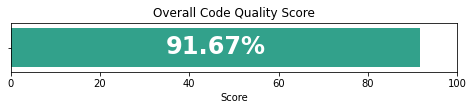

In [34]:
# スコアを計算
score = (1 - total_category_error_rate) * 100

# スコアを表示するためのデータフレームを作成
# スコアを表示するためのデータフレームを作成
score_df = pd.DataFrame([{'Score': score}], index=['Code Quality'])

# グラフの設定
plt.figure(figsize=(8, 1))
barplot = sns.barplot(x=score_df['Score'], y=score_df.index, orient='h', color='#1fb496')  # カラーコードで色を指定

# グラフの詳細設定
barplot.set_xlim(0, 100)
barplot.set_yticklabels([])
# barplot.set_xlabel('Score')
plt.title('Overall Code Quality Score')


# スコアのテキストを追加
plt.text(score/2, 0, f'{score:.2f}%', color='white', va='center', ha='center', fontsize=24, weight='bold')

# グラフの上部に余白を追加
plt.subplots_adjust(top=0.8)  # topパラメータを調整して余白を追加

# グラフを保存
# plt.savefig('overall_code_quality_score.png')

# グラフを表示
plt.show()

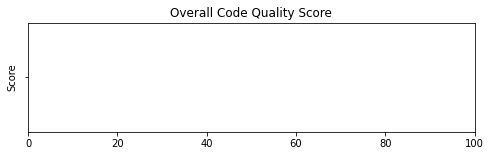

In [18]:
# 横棒グラフを作成
plt.figure(figsize=(8, 2))
barplot = sns.barplot(data=score_df, y='Score', x=[0], orient='h', color='#1f77b4')  # 色を変更

# グラフの詳細設定
barplot.set_xlim(0, 100)
barplot.set_yticklabels([])
# barplot.set_xlabel('Score')
plt.title('Overall Code Quality Score')

# スコアのテキストを追加
plt.text(score/2, 0, f'{score:.2f}%', color='white', va='center', ha='center', fontsize=12, weight='bold')  # テキストの色を変更

# # グラフを保存
# plt.savefig('overall_code_quality_score.png')

# グラフを表示
plt.show()

In [12]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# JSONファイルを開いてデータを読み込む
with open('../deepsource_response.json', 'r') as file:
    data = json.load(file)

# occurrenceDistributionByAnalyzerのデータを取得
analyzers_data = data['data']['repository']['analysisRuns']['edges'][0]['node']['summary']['occurrenceDistributionByAnalyzer']

# occurrenceDistributionByCategoryのデータを取得
categories_data = data['data']['repository']['analysisRuns']['edges'][0]['node']['summary']['occurrenceDistributionByCategory']

# 言語別の行数を読み込む
with open('../language_lines.json', 'r') as file:
    language_lines = json.load(file)

# エラー率を計算するための関数
def calculate_error_rate(row, total_lines):
    if total_lines > 0:
        return row['introduced'] / total_lines
    return None

# 言語別のエラー率を計算とグラフ描写
analyzers_df = pd.DataFrame(analyzers_data)
analyzers_df['error_rate'] = analyzers_df.apply(lambda row: calculate_error_rate(row, language_lines.get(row['analyzerShortcode'].lower(), 0)), axis=1)

# 全体のエラー率を計算
total_errors = analyzers_df['introduced'].sum()
total_lines = sum(language_lines.values())
total_error_rate = total_errors / total_lines if total_lines > 0 else None
new_row = pd.DataFrame({'analyzerShortcode': ['Total'], 'error_rate': [total_error_rate]})
analyzers_df = pd.concat([analyzers_df, new_row], ignore_index=True)


# # エラー率の棒グラフを作成（言語別）
# plt.figure(figsize=(10, 6))
# barplot = sns.barplot(data=analyzers_df, x='analyzerShortcode', y='error_rate')
# barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=10)
# plt.title('Error Rate by Language')
# plt.xlabel('Language')
# plt.ylabel('Error Rate')
# plt.savefig('error_rate_by_language.png')

# カテゴリ別のエラー率を計算とグラフ描写
categories_df = pd.DataFrame(categories_data)
categories_df['error_rate'] = categories_df.apply(lambda row: calculate_error_rate(row, total_lines), axis=1)

# カテゴリ別のエラー率の合計を計算
total_category_error_rate = categories_df['error_rate'].sum()

# 指定したエラーカテゴリ
error_categories = ['ANTI_PATTERN', 'BUG_RISK', 'PERFORMANCE', 'SECURITY', 'COVERAGE', 'TYPECHECK', 'SECRETS', 'STYLE', 'DOCUMENTATION']

# 指定したカテゴリにデータがない場合は0を設定
for category in error_categories:
    if category not in categories_df['category'].values:
        new_row = pd.DataFrame({'category': [category], 'error_rate': [0]})
        categories_df = pd.concat([categories_df, new_row], ignore_index=True)

# カテゴリ別のエラー率の合計をデータフレームに追加
new_row = pd.DataFrame({'category': ['Total'], 'error_rate': [total_category_error_rate]})
categories_df = pd.concat([categories_df, new_row], ignore_index=True)
categories_df

,category,introduced,error_rate
0,DOCUMENTATION,9.0,0.070312
1,STYLE,125.0,0.976562
2,ANTI_PATTERN,28.0,0.218750
3,SECURITY,6.0,0.046875
4,BUG_RISK,5.0,0.039062
5,PERFORMANCE,NaN,0.000000
6,COVERAGE,NaN,0.000000
7,TYPECHECK,NaN,0.000000
8,SECRETS,NaN,0.000000
9,Total,NaN,1.351562


,Score
Code Quality,-35.15625


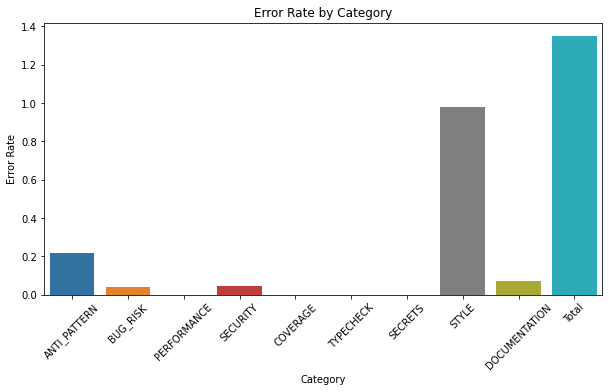

In [14]:
# エラー率の棒グラフを作成（カテゴリ別）
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=categories_df, x='category', y='error_rate', order=error_categories + ['Total'])
barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=10, rotation=45)
plt.title('Error Rate by Category')
plt.xlabel('Category')
plt.ylabel('Error Rate')
# グラフの上部に余白を追加
plt.subplots_adjust(bottom=0.25)  # topパラメータを調整して余白を追加
# plt.savefig('error_rate_by_category.png')

# # グラフを表示
# plt.show()

# スコアを計算
score = (1 - total_category_error_rate) * 100

# スコアを表示するためのデータフレームを作成
score_df = pd.DataFrame([{'Score': score}], index=['Code Quality'])
score_df
# グラフの設定
plt.figure(figsize=(8, 1))
barplot = sns.barplot(x=score_df['Score'], y=score_df.index, orient='h', color='#1fb496')  # カラーコードで色を指定

# グラフの詳細設定
barplot.set_xlim(0, 100)
barplot.set_yticklabels([])
barplot.set_ylabel('Score')
plt.title('Overall Code Quality Score')


# スコアのテキストを追加
plt.text(score/2, 0, f'{score:.1f}Point', color='white', va='center', ha='center', fontsize=24, weight='bold')

# グラフの上部に余白を追加
plt.subplots_adjust(top=0.7)  # topパラメータを調整して余白を追加

# グラフを保存
# plt.savefig('overall_code_quality_score.png')

# # グラフを表示
plt.show()

In [15]:
total_category_error_rate

1.3515625